start exercice

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [23]:
df=pd.read_csv("AMZN.csv")
print(df.head(5))

        Price           Adj Close               Close                High  \
0      Ticker                AMZN                AMZN                AMZN   
1  2015-01-02  15.425999641418457  15.425999641418457  15.737500190734863   
2  2015-01-05   15.10949993133545   15.10949993133545  15.418999671936035   
3  2015-01-06   14.76449966430664   14.76449966430664  15.149999618530273   
4  2015-01-07  14.920999526977539  14.920999526977539  15.064000129699707   

                  Low                Open    Volume  
0                AMZN                AMZN      AMZN  
1  15.347999572753906  15.628999710083008  55664000  
2  15.042499542236328  15.350500106811523  55484000  
3  14.619000434875488  15.112000465393066  70380000  
4  14.766500473022461              14.875  52806000  


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      2498 non-null   object
 1   Adj Close  2498 non-null   object
 2   Close      2498 non-null   object
 3   High       2498 non-null   object
 4   Low        2498 non-null   object
 5   Open       2498 non-null   object
 6   Volume     2498 non-null   object
dtypes: object(7)
memory usage: 136.7+ KB


As we can see, all the data is of the 'object' type. This could be a hindrance when performing mathematical operations, so we will convert the relevant data to a numeric type in the following steps.

In [25]:
df.shape

(2498, 7)

In [26]:
df.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,2498,2498,2498,2498,2498,2498,2498
unique,2498,2451,2451,2436,2443,2403,2466
top,2024-12-03,125.9800033569336,125.9800033569336,124.4000015258789,49.099998474121094,81.1500015258789,60512000
freq,1,3,3,3,4,3,3


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.dropna()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
1,2015-01-02,15.425999641418457,15.425999641418457,15.737500190734863,15.347999572753906,15.628999710083008,55664000
2,2015-01-05,15.10949993133545,15.10949993133545,15.418999671936035,15.042499542236328,15.350500106811523,55484000
3,2015-01-06,14.76449966430664,14.76449966430664,15.149999618530273,14.619000434875488,15.112000465393066,70380000
4,2015-01-07,14.920999526977539,14.920999526977539,15.064000129699707,14.766500473022461,14.875,52806000
...,...,...,...,...,...,...,...
2493,2024-11-26,207.86000061035156,207.86000061035156,208.0,201.7899932861328,201.89999389648438,41673700
2494,2024-11-27,205.74000549316406,205.74000549316406,207.63999938964844,205.0500030517578,206.97999572753906,28061600
2495,2024-11-29,207.88999938964844,207.88999938964844,208.1999969482422,204.58999633789062,205.8300018310547,24892400
2496,2024-12-02,210.7100067138672,210.7100067138672,212.99000549316406,209.50999450683594,209.9600067138672,39523200


The is an error in the first name column , so let´s change "Price" to "Date".

In [52]:
df=df.rename(columns={"Price":"Date"})

Similarly, the first row is redundant because the only company we are analysing is Amazon, so let´s delete it.

In [30]:
df=df.drop(index=[0])

In [31]:
df.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
1,2015-01-02,15.425999641418457,15.425999641418457,15.737500190734863,15.347999572753906,15.628999710083008,55664000
2,2015-01-05,15.10949993133545,15.10949993133545,15.418999671936035,15.042499542236328,15.350500106811523,55484000
3,2015-01-06,14.76449966430664,14.76449966430664,15.149999618530273,14.619000434875488,15.112000465393066,70380000
4,2015-01-07,14.920999526977539,14.920999526977539,15.064000129699707,14.766500473022461,14.875,52806000
5,2015-01-08,15.02299976348877,15.02299976348877,15.156999588012695,14.805500030517578,15.015999794006348,61768000


Once the exploration of the table and data has been completed, and after confirming that there are no values 
that could hinder the analysis (such as null or incomplete values), we will proceed to study 
how the variables are related and analyze price trends with respect to seasons and periods.

How i mentionated in the top of the study, it´s necesary to transform the "oject" data to "numeric.

In [46]:
df["Date"]=pd.to_datetime(df["Date"])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])


Since we don´t have a unique price, i have chosen to take the *mean* of high price and low price.

In [45]:

df["Month"]=df["Date"].dt.to_period("M")
df["Daily_avg_price"]=(df["High"] + df["Low"])/2

In [59]:
monthly_avg_price=df.groupby("Month")["Daily_avg_price"].mean()
print(monthly_avg_price)

Month
2015-01     15.145625
2015-02     18.741921
2015-03     18.780659
2015-04     19.726655
2015-05     21.363925
              ...    
2024-08    172.152955
2024-09    184.714999
2024-10    186.847828
2024-11    204.025000
2024-12    211.542500
Freq: M, Name: Daily_avg_price, Length: 120, dtype: float64


Since there are many years, we will divide the data and take only the annual average.

In [60]:
df["Year"]=df["Date"].dt.year

In [61]:
annual_avg_price=df.groupby("Year")["Daily_avg_price"].mean()
print(annual_avg_price)

Year
2015     23.901959
2016     34.961280
2017     48.381321
2018     82.067009
2019     89.392685
2020    133.980081
2021    167.254978
2022    126.166981
2023    121.262380
2024    181.197704
Name: Daily_avg_price, dtype: float64


In [62]:
annual_avg_price_df=annual_avg_price.reset_index()
print(annual_avg_price_df.head(5))

   Year  Daily_avg_price
0  2015        23.901959
1  2016        34.961280
2  2017        48.381321
3  2018        82.067009
4  2019        89.392685


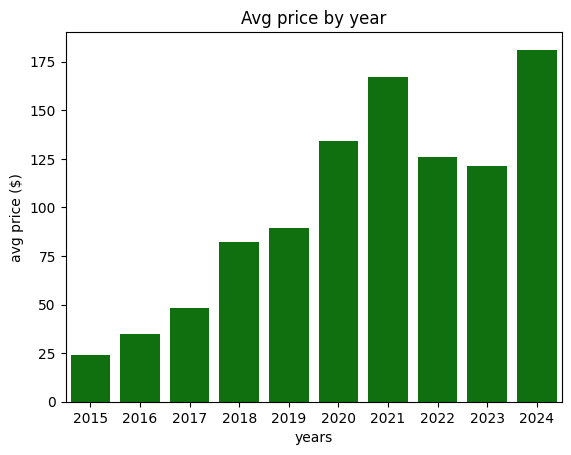

In [63]:

sns.barplot(x="Year",y="Daily_avg_price",data=annual_avg_price_df,color="green")
plt.title("Avg price by year")
plt.xlabel("years")
plt.ylabel("avg price ($)")
plt.show()

In the same way, let´s explore how the volume behaves.

In [72]:
df["Volume"]=pd.to_numeric(df["Volume"]/1e7)

In [74]:
avg_volume_year=df.groupby("Year")["Volume"].mean()
print(avg_volume_year)

Year
2015     7.596048
2016     8.244098
2017     7.033509
2018    11.297989
2019     7.735318
2020     9.861982
2021     6.776334
2022     7.608070
2023     5.883159
2024     4.136707
Name: Volume, dtype: float64


In [76]:
avg_volume_year_df=avg_volume_year.reset_index()

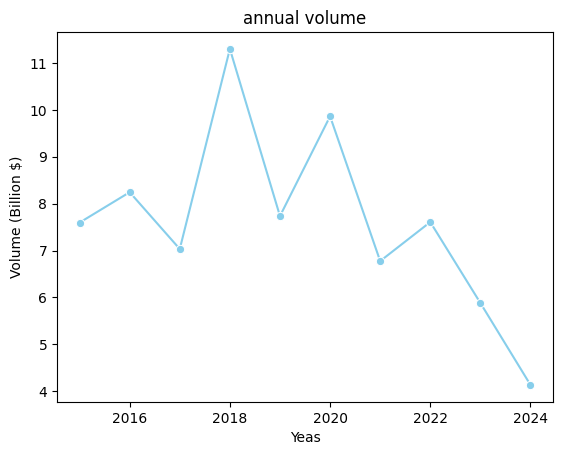

In [77]:
plt.Figure(figsize=(10,5))
sns.lineplot(x="Year",y="Volume",data=avg_volume_year_df,color="skyblue", marker="o")
plt.title("annual volume")
plt.xlabel("Yeas")
plt.ylabel("Volume (Billion $)")
plt.show()


In [106]:
correlation=(annual_avg_price_df["Daily_avg_price"]).corr(avg_volume_year_df["Volume"])
print(round(correlation,4))

-0.3897


In [105]:
standard_deviation=avg_volume_year_df.iloc[2:6 , 1].std()
print(round(standard_deviation,4))

1.957


In [103]:
Evolution_of_price=((181.197-23.90)/23.90)*100 
print(round(Evolution_of_price,3), "%")

658.146 %


Once the study was made, let´s traduces the data in information:

- As we can apreciate, the mean price have two big jumps, the firts was produced from 20217 to 2018, when the price increases around 95.23% , 
  the second one, is once again a growth from 2019 to 2021 around 87.10% .

- On the other hand, the volume experienced significant volatility between 2017 and 2020 , which could indicate factors related to the economy or internal issues within the company. Finally, since 2021, the volume has decreased by around 39%.

- In statistical terms, Amazon's stock price growth over the past 8 years is approximately 658.14%. The correlation between the 'annual average price' and 'volume' is somewhat weak at -0.3897. Additionally, we can observe the significant 'rally' between 2017 and 2020, which resulted in a standard deviation of $1.95 trillion.